<a href="https://www.kaggle.com/code/bhavinmoriya/derivatives-pricing-future-forwards-options?scriptVersionId=114447906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Future and Forward

- Forward is a contract b/w two parties, where one decides the price (strike price) of commodity (stock, bond etc) for future date (maturity date).
- Done over the counter 
- Future is same as forward, only difference is, it is done via exchange, and hence it is much safer.
- Future payoffs are implemented daily (i.e if maturity is after 5 days then each day payoff is calculated.
- one who sells future is called in short position and one who buys is called long position

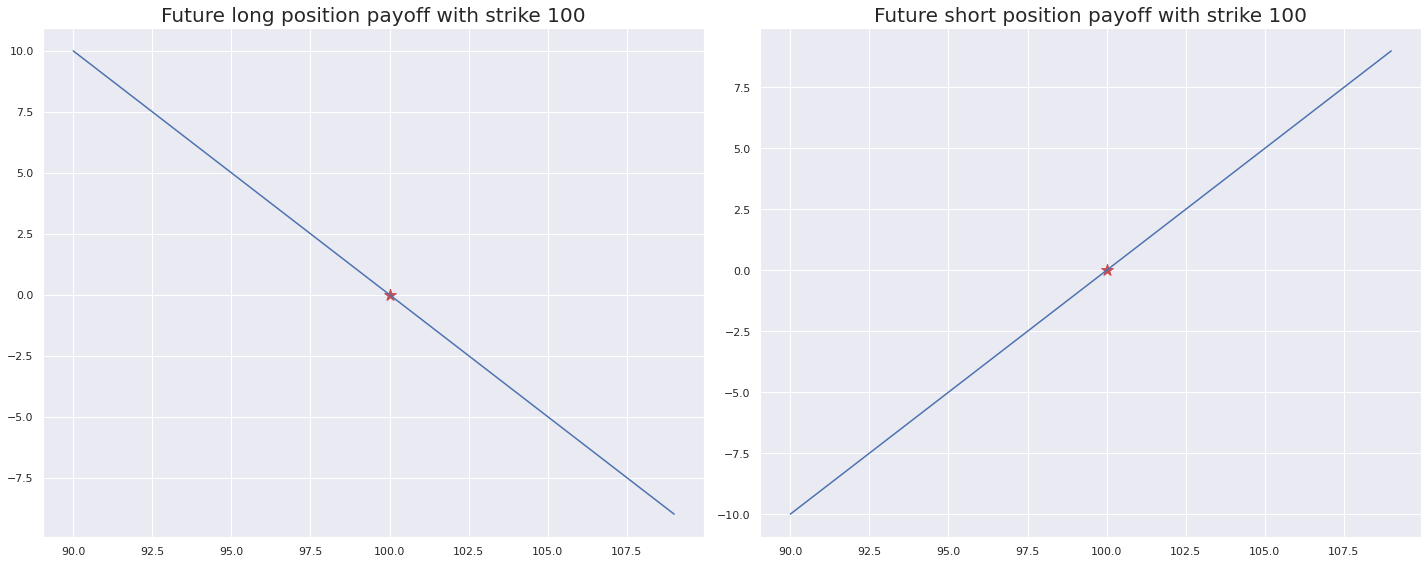

In [2]:
def future_payoff(strike):
    fig, ax = plt.subplots(1,2, figsize=(20,8))
    x = [strike + i for i in range(-10,10)]
    long = [strike - a for a in x]
    short = [-(strike - a) for a in x]
    ax[0].plot(x,long)
    ax[0].scatter(strike,0, marker='*', s=150, c='r')
    ax[0].set_title(f'Future long position payoff with strike {strike}', fontsize=20)
    ax[1].plot(x,short)
    ax[1].scatter(strike,0, marker='*', s=150, c='r')
    ax[1].set_title(f'Future short position payoff with strike {strike}', fontsize=20)
    plt.tight_layout()
future_payoff(100)

- One big difference with the mechanism of forward contracts is the daily settlement. 
- In a forward contract no money changes hands before maturity. 
- But in a futures contract, money moves to one party to the other each day, according to the evolution of the corresponding future price.
- In order to manage these payments, the exchanges require depositing an initial margin, an initial amount of money, in a margin account.
- As the future price changes, money is withdrawn or deposited (if F t i+1 −F t i is negative) from it. 
- The balance of the margin account must stay above a level called maintenance margin. 
- If it ever falls below this quantity, the holder of the contract receives a margin call and is required to deposit more money in order for the balance to be equal again to the initial margin.

In [3]:
def future_long(strike=100, margin=15, maintenance=10, maturity=5):
    '''Assume that we go long in a futures contract with maturity in 5
days, with today’s future price equal to 100€. The initial margin is
assumed to be 15€ and the maintenance level equal to 10€. Now,
assume that the evolution of the future price in the next 5 days is
(in €): as below'''
    deposit=margin
    addition_deposit = []
    future_price = np.random.choice([strike + i for i in range(-10,10)], size=maturity)
#     future_price = [101, 104, 89, 90, 90]
    oscilation=[future_price[0]-strike]
    for i in range(1,maturity):
        oscilation.append(future_price[i] - future_price[i-1])
    for i in oscilation:
        deposit += i
        if deposit < maintenance:
            print(f'MARGIN CALL : Deposit is {deposit}')
            addition_deposit.append(15 - deposit)
            deposit = 15
        else:
            continue
    profit = deposit - np.sum(addition_deposit) - margin
    return future_price, oscilation, addition_deposit, profit

future_long()      

MARGIN CALL : Deposit is 6


(array([100, 103,  91, 109,  90]), [0, 3, -12, 18, -19], [9], -10)

In [4]:
def future_short(strike=100, margin=15, maintenance=10, maturity=5):
    '''Assume that we go short in a futures contract with maturity in 5
days, with today’s future price equal to 100€. The initial margin is
assumed to be 15€ and the maintenance level equal to 10€. Now,
assume that the evolution of the future price in the next 5 days is
(in €): as below'''
    deposit=margin
    addition_deposit = []
    future_price = np.random.choice([strike + i for i in range(-10,10)], size=maturity)
#     future_price = [101, 104, 89, 90, 90]
    oscilation=[-(future_price[0]-strike)]
    for i in range(1,maturity):
        oscilation.append(-(future_price[i] - future_price[i-1]))
    for i in oscilation:
        deposit += i
        if deposit < maintenance:
            print(f'MARGIN CALL : Deposit is {deposit}')
            addition_deposit.append(15 - deposit)
            deposit = 15
        else:
            continue
    profit = deposit - np.sum(addition_deposit) - margin
    return future_price, oscilation, addition_deposit, profit

future_short()      

MARGIN CALL : Deposit is 8


(array([102,  97,  91, 107,  97]), [-2, 5, 6, -16, 10], [7], 3)

Problem with the short is, the loss could be infinite and hence it is a risky game. Unless we know, price is going to fall below strike, we will not short it. Long all you could lose is the strike price.

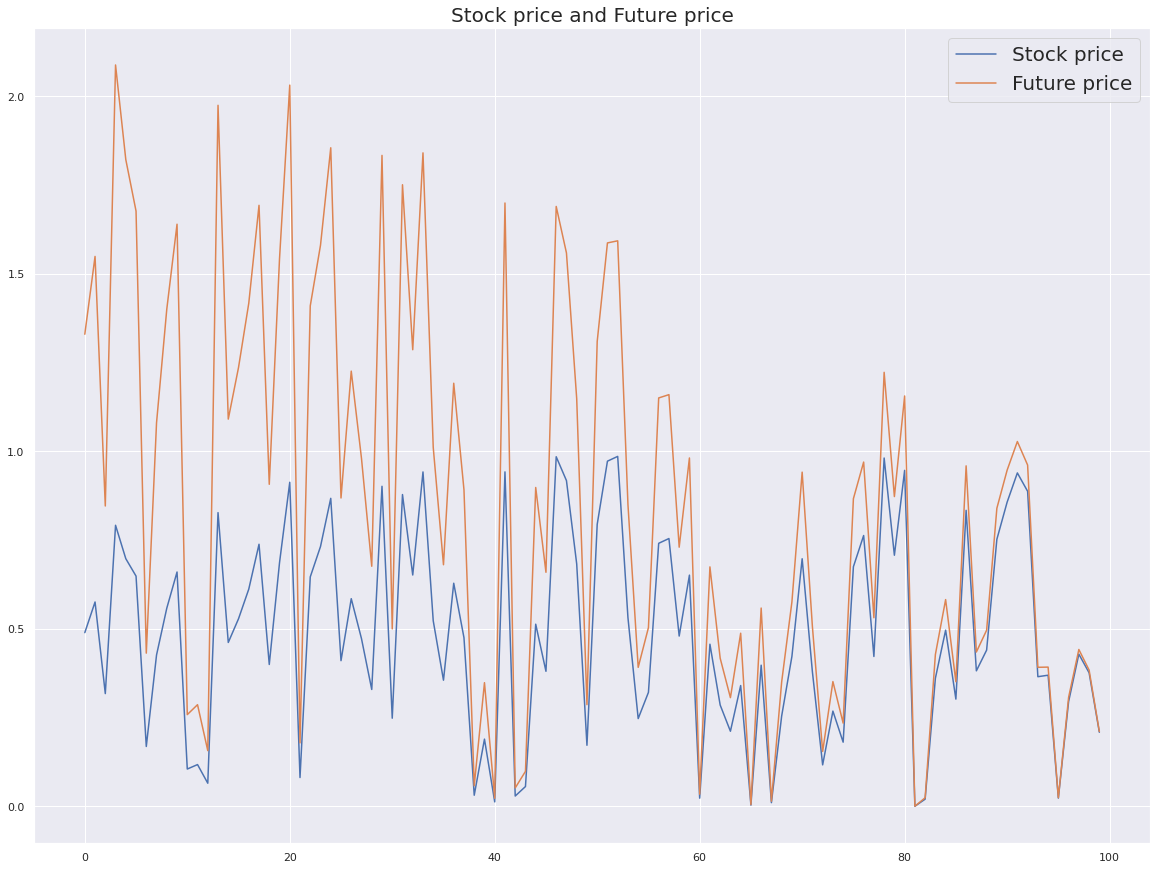

In [5]:
def future_price(stock_price=np.random.random(size=100), r=.01):
    '''compute future price based on stock price for time interval of length 100'''
    future = np.zeros_like(stock_price)
    for i in range(100):
        future[i] = stock_price[i] * np.exp(r * (100-i))
    plt.figure(figsize=(20,15))
    plt.plot(stock_price, label='Stock price')
    plt.plot(future, label='Future price')
    plt.legend(fontsize=20)
    plt.title('Stock price and Future price', fontsize=20)
#     return stock_price.shape, future.shape
future_price()

As you can see in the above graph future price always converge to the stock price at the end of the time period.

- future is more credible over forwards
- options are right to buy or sell the asset while future was an obligation to buy or sell

Examples:
- Person A agrees to sell sugar to Person B in future date with predefined price is a forward
- Person A agrees to sell sugar to Person B in future date with predefined price with an intermediater (eg. bank, broker, stock ex etc.) is a future
- Person A (short) gives right to buy to Person B (long) in future date with predefined price is an option

# Options

- Call : right to buy
    - long call : Buyer of call
    - short call : Seller of call
- Put : right to sell
    - long put : Buyer of put
    - short put : Seller of put

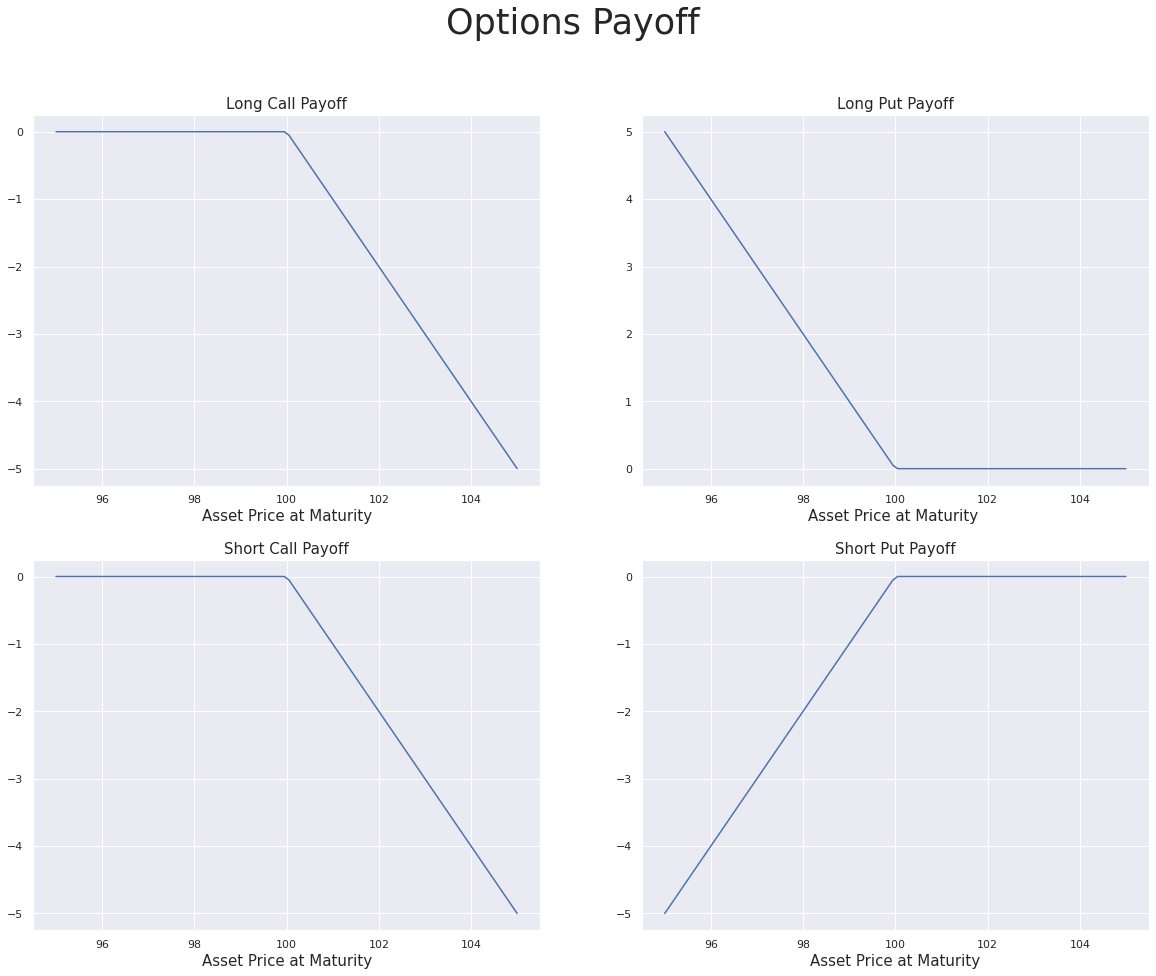

In [6]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
ax = ax.flatten()

# We will keep the strike price to be 100

x = np.linspace(95,105,100)
f = lambda a : 0 if a <= 100 else 100-a
ax[0].plot(x, list(map(f,x)))
ax[0].set_xlabel('Asset Price at Maturity', fontsize=15)
# ax[1].axhline(100, xmin=95, xmax=100)
ax[0].set_title('Long Call Payoff', fontsize=15)

x = np.linspace(95,105,100)
f = lambda a : 100-a if a <= 100 else 0
ax[1].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[1].set_title('Long Put Payoff', fontsize=15)
ax[1].set_xlabel('Asset Price at Maturity ', fontsize=15)

x = np.linspace(95,105,100)
f = lambda a : a-100 if a <= 100 else 0
ax[3].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[3].set_title('Short Put Payoff', fontsize=15)
ax[3].set_xlabel('Asset Price at Maturity', fontsize=15)



x = np.linspace(95,105,100)
f = lambda a : 0 if a <= 100 else 100-a
ax[2].plot(x, list(map(f,x)))
# ax[1].axhline(100, xmin=95, xmax=100)
ax[2].set_title('Short Call Payoff', fontsize=15)
ax[2].set_xlabel('Asset Price at Maturity', fontsize=15)

# plt.tight_layout()
plt.suptitle('Options Payoff', fontsize=35);

- Option price is inversely proportional to strike price for the CALL
- Option price is proportional to strike price for the PUT
- Call options are more expensive when interest rates are high, and put prices are more expensive when interest rates are low
- option prices are an increasing function of volatility
- option price = INTRINSIC VALUE + TIME VALUE (EXTRINSIC VALUE)
    - IV = DIFFRENCE B/W STOCK PRICE AND STRIKE PRICE
    - TIME VALUE = TIME PERIOD UNTIL MATURITY
    - LONGER THE TIME VALUE, HIGHER CHANCE OF VOLTATILITY AND HENCE HIGHT THE PRICE OF OPTION
- the volatility affects only the time value of an option, and not its intrinsic value
- Long maturities increase the probabilities of getting a huge payoff, and then options with long maturities (both calls and puts) tend to be more expensive
- Very short maturities imply that the price of the option is close to its intrinsic value, while for long-term options, the time value is higher and the option price differs from this intrinsic value.